# Indice de contenido de clorofilas : ICC

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Read the Excel sheet
UV180 = pd.read_excel('DATOS T1 Y T9_V3.xlsx', sheet_name='UV180', parse_dates=['H'])
UV250 = pd.read_excel('DATOS T1 Y T9_V3.xlsx', sheet_name='UV250', parse_dates=['H'])
UV395 = pd.read_excel('DATOS T1 Y T9_V3.xlsx', sheet_name='UV395', parse_dates=['H'])


df = pd.concat([UV180, UV250, UV395], ignore_index=True)


# Remove the '°C' suffix from the 'Temperatura' column
df['Temperatura'] = df['Temperatura'].str.replace('°C', '')

df['Temperatura']= df['Temperatura'].astype('float')

# Display the dataframe
print(df.head())

/var/folders/n_/jr7n3tyn6l9bdfkx3fyszj1c0000gn/T/ipykernel_97407/1751100231.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  UV180 = pd.read_excel('DATOS T1 Y T9_V3.xlsx', sheet_name='UV180', parse_dates=['H'])
/var/folders/n_/jr7n3tyn6l9bdfkx3fyszj1c0000gn/T/ipykernel_97407/1751100231.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  UV250 = pd.read_excel('DATOS T1 Y T9_V3.xlsx', sheet_name='UV250', parse_dates=['H'])


   Temperatura    Hr      UV  DIA          H  Muestra     T1     T9
0         15.0  0.79  180 nm    1 2023-10-27        1  280.8  274.6
1         15.0  0.79  180 nm    1 2023-10-27        2  243.2  280.4
2         15.0  0.79  180 nm    1 2023-10-27        3  242.6  265.0
3         15.0  0.79  180 nm    1 2023-10-27        4  251.6  274.1
4         15.0  0.79  180 nm    1 2023-10-27        5  247.6  249.2


/var/folders/n_/jr7n3tyn6l9bdfkx3fyszj1c0000gn/T/ipykernel_97407/1751100231.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  UV395 = pd.read_excel('DATOS T1 Y T9_V3.xlsx', sheet_name='UV395', parse_dates=['H'])


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperatura  1215 non-null   float64       
 1   Hr           1215 non-null   float64       
 2   UV           1215 non-null   object        
 3   DIA          1215 non-null   int64         
 4   H            1215 non-null   datetime64[ns]
 5   Muestra      1215 non-null   int64         
 6   T1           1215 non-null   float64       
 7   T9           1215 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 76.1+ KB


In [5]:
df['H']= df['H'].dt.time

In [6]:
df['H'].unique()

array([datetime.time(0, 0), datetime.time(5, 0), datetime.time(10, 0),
       datetime.time(15, 0), datetime.time(20, 0), datetime.time(1, 0),
       datetime.time(6, 0), datetime.time(11, 0), datetime.time(16, 0),
       datetime.time(21, 0), datetime.time(2, 0), datetime.time(7, 0),
       datetime.time(12, 0), datetime.time(17, 0), datetime.time(22, 0)],
      dtype=object)

In [7]:
# Combine 'day' and 'hour' into a single datetime column
df['Time'] = df['DIA'].astype(str) + ' ' + pd.to_datetime(df['H'], format='%H:%M:%S').dt.strftime('%H:%M:%S')
df['Time'] = pd.to_datetime(df['Time'], format='%d %H:%M:%S')


df.head()

,Temperatura,Hr,UV,DIA,H,Muestra,T1,T9,Time
0,15.0,0.79,180 nm,1,00:00:00,1,280.8,274.6,1900-01-01
1,15.0,0.79,180 nm,1,00:00:00,2,243.2,280.4,1900-01-01
2,15.0,0.79,180 nm,1,00:00:00,3,242.6,265.0,1900-01-01
3,15.0,0.79,180 nm,1,00:00:00,4,251.6,274.1,1900-01-01
4,15.0,0.79,180 nm,1,00:00:00,5,247.6,249.2,1900-01-01


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperatura  1215 non-null   float64       
 1   Hr           1215 non-null   float64       
 2   UV           1215 non-null   object        
 3   DIA          1215 non-null   int64         
 4   H            1215 non-null   object        
 5   Muestra      1215 non-null   int64         
 6   T1           1215 non-null   float64       
 7   T9           1215 non-null   float64       
 8   Time         1215 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 85.6+ KB


In [9]:
time_difference = df['Time'] - df['Time'].iloc[0]

# Convert the time difference to hours
df['HOUR'] = time_difference.dt.total_seconds() / 3600

In [10]:
#len(df['Time'].unique())
df['HOUR'].unique()

array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60.,
       65., 70.])

In [11]:
df['UV'].value_counts()

UV
180 nm    405
250 nm    405
395 nm    405
Name: count, dtype: int64

In [12]:
print(df['UV'].unique())
print(df['DIA'].unique())
print(df['Muestra'].unique())

['180 nm' '250 nm' '395 nm']
[1 2 3]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27]


In [13]:
df[['Temperatura', 'Hr', 'T1','T9']].describe()

,Temperatura,Hr,T1,T9
count,1215.000000,1215.000000,1215.000000,1215.000000
mean,14.246667,0.729400,225.888642,241.781811
std,3.054678,0.119549,84.437622,60.501606
min,9.500000,0.530000,10.200000,76.300000
25%,11.200000,0.610000,193.200000,206.750000
50%,14.700000,0.750000,241.200000,248.600000
75%,17.000000,0.840000,247.600000,267.250000
max,20.000000,0.910000,737.000000,763.800000


Text(0.5, 1.0, 'Material T1')

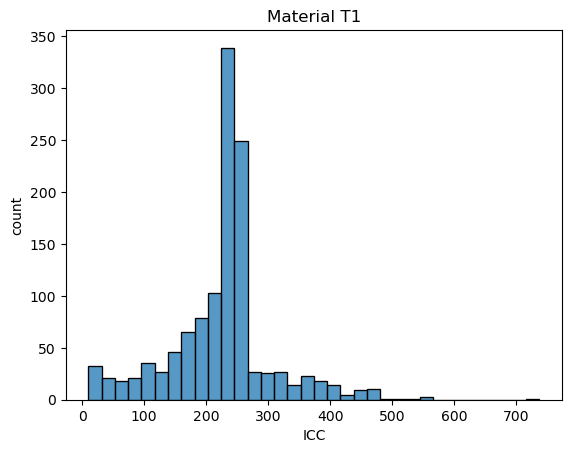

In [14]:
sns.histplot(data= df, x='T1', bins=int(np.sqrt(len(df)))) #binwidth=1)
plt.xlabel('ICC')
plt.ylabel('count')
plt.title('Material T1')

Text(0.5, 1.0, 'Material T9')

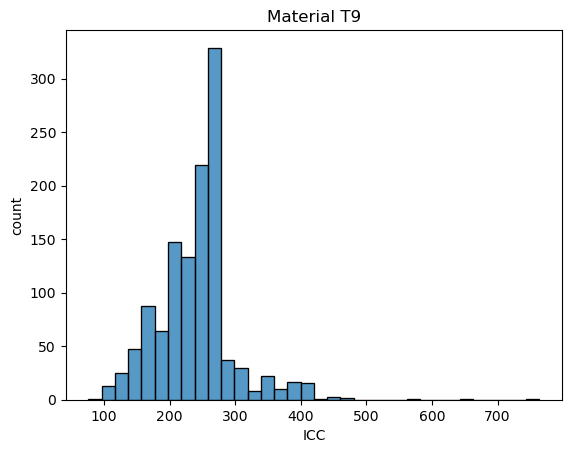

In [15]:
sns.histplot(data= df, x='T9', bins=int(np.sqrt(len(df)))) #binwidth=1)
plt.xlabel('ICC')
plt.ylabel('count')
plt.title('Material T9')

In [16]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

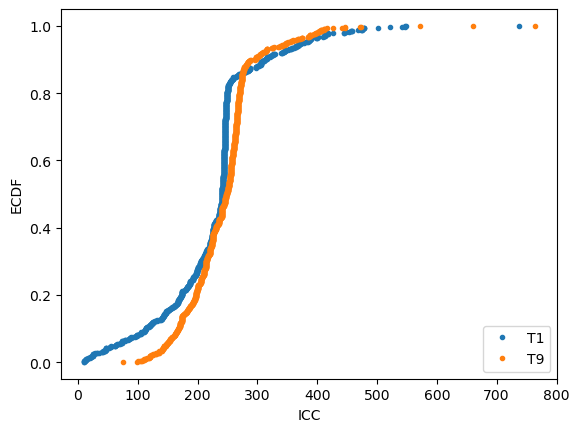

In [17]:
# Compute ECDFs
x_set, y_set = ecdf(df['T1'])
x_vers, y_vers = ecdf(df['T9'])

# Plot all ECDFs on the same plot
_ = plt.plot(x_set, y_set, marker='.', linestyle='none')
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')



# Annotate the plot
plt.legend(('T1', 'T9'), loc='lower right')
_ = plt.xlabel('ICC')
_ = plt.ylabel('ECDF')


/var/folders/n_/jr7n3tyn6l9bdfkx3fyszj1c0000gn/T/ipykernel_97407/2634114768.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(['$T_0$','$T_1$','$T_2$','$T_3$','$T_4$','$T_5}$','$T_6$', '$T_7$', '$T_8$', '$T_9$','$T_{10}$','$T_{11}$','$T_{12}$','$T_{13}$','$T_{14}$'])


[Text(0, 0, '$T_0$'),
 Text(1, 0, '$T_1$'),
 Text(2, 0, '$T_2$'),
 Text(3, 0, '$T_3$'),
 Text(4, 0, '$T_4$'),
 Text(5, 0, '$T_5}$'),
 Text(6, 0, '$T_6$'),
 Text(7, 0, '$T_7$'),
 Text(8, 0, '$T_8$'),
 Text(9, 0, '$T_9$'),
 Text(10, 0, '$T_{10}$'),
 Text(11, 0, '$T_{11}$'),
 Text(12, 0, '$T_{12}$'),
 Text(13, 0, '$T_{13}$'),
 Text(14, 0, '$T_{14}$')]

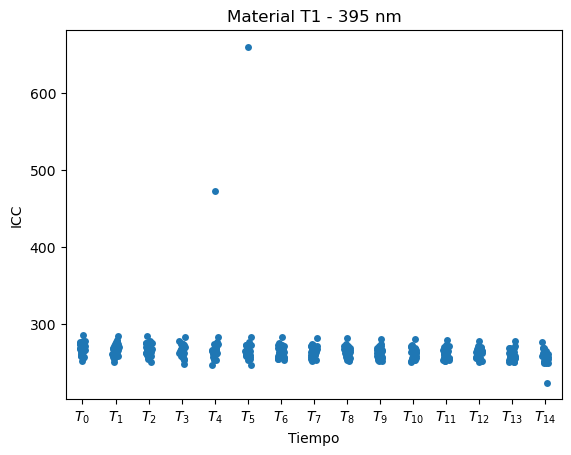

In [18]:
#g = sns.stripplot(x="Time", y="T1", data=df[df["UV"]=='180 nm'])
#g = sns.stripplot(x="Time", y="T9", data=df[df["UV"]=='180 nm'])
#g = sns.stripplot(x="Time", y="T1", data=df[df["UV"]=='250 nm'])
#g = sns.stripplot(x="Time", y="T9", data=df[df["UV"]=='250 nm'])
#g = sns.stripplot(x="Time", y="T1", data=df[df["UV"]=='395 nm'])
g = sns.stripplot(x="Time", y="T9", data=df[df["UV"]=='395 nm'])


g.set_xlabel('Tiempo')
g.set_ylabel('ICC')
g.set_title('Material T1 - 395 nm')
g.set_xticklabels(['$T_0$','$T_1$','$T_2$','$T_3$','$T_4$','$T_5}$','$T_6$', '$T_7$', '$T_8$', '$T_9$','$T_{10}$','$T_{11}$','$T_{12}$','$T_{13}$','$T_{14}$'])
                               

[Text(0, 0, '$T_0$'),
 Text(1, 0, '$T_1$'),
 Text(2, 0, '$T_2$'),
 Text(3, 0, '$T_3$'),
 Text(4, 0, '$T_4$'),
 Text(5, 0, '$T_5$'),
 Text(6, 0, '$T_6$'),
 Text(7, 0, '$T_7$'),
 Text(8, 0, '$T_8$'),
 Text(9, 0, '$T_9$'),
 Text(10, 0, '$T_{10}$'),
 Text(11, 0, '$T_{11}$'),
 Text(12, 0, '$T_{12}$'),
 Text(13, 0, '$T_{13}$'),
 Text(14, 0, '$T_{14}$')]

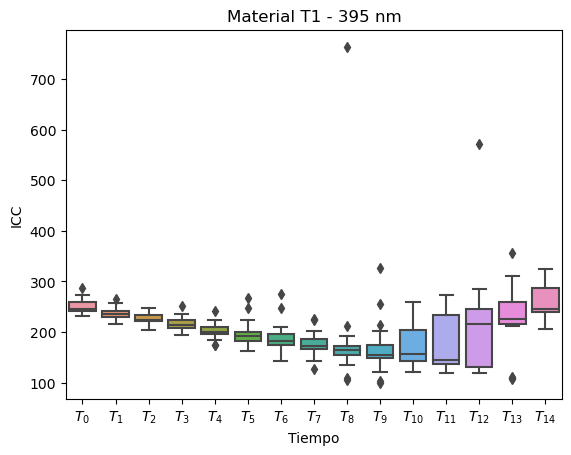

In [19]:
#g = sns.boxplot(x="Time", y="T1", data=df[df["UV"]=='180 nm'])
#g = sns.boxplot(x="Time", y="T9", data=df[df["UV"]=='180 nm'])
#g = sns.boxplot(x="Time", y="T1", data=df[df["UV"]=='250 nm'])
g = sns.boxplot(x="Time", y="T9", data=df[df["UV"]=='250 nm'])
#g = sns.boxplot(x="Time", y="T1", data=df[df["UV"]=='395 nm'])
#g = sns.boxplot(x="Time", y="T9", data=df[df["UV"]=='395 nm'])

g.set_xlabel('Tiempo')
g.set_ylabel('ICC')
g.set_title('Material T1 - 395 nm')
g.set_xticklabels(['$T_0$','$T_1$','$T_2$','$T_3$','$T_4$','$T_5$','$T_6$', '$T_7$', '$T_8$', '$T_9$','$T_{10}$','$T_{11}$','$T_{12}$','$T_{13}$','$T_{14}$'])
 

In [20]:
# Melt the DataFrame
melted_df = pd.melt(df, id_vars=["Temperatura", "Hr", "UV","Muestra","Time","HOUR"] , value_vars=["T1", "T9"], var_name="Material", value_name="Value")

melted_df.head()

,Temperatura,Hr,UV,Muestra,Time,HOUR,Material,Value
0,15.0,0.79,180 nm,1,1900-01-01,0.0,T1,280.8
1,15.0,0.79,180 nm,2,1900-01-01,0.0,T1,243.2
2,15.0,0.79,180 nm,3,1900-01-01,0.0,T1,242.6
3,15.0,0.79,180 nm,4,1900-01-01,0.0,T1,251.6
4,15.0,0.79,180 nm,5,1900-01-01,0.0,T1,247.6


In [21]:
# Combine 'Clase' and 'UV' into a single column
#df['Time'] = df['DIA'].astype(str) + ' ' + pd.to_datetime(df['H'], format='%H:%M:%S').dt.strftime('%H:%M:%S')
melted_df['Measurement']= melted_df['Material'] +'_'+melted_df['UV'].str.replace(' nm', '')

Text(0.5, 1.0, 'Combined Boxplot')

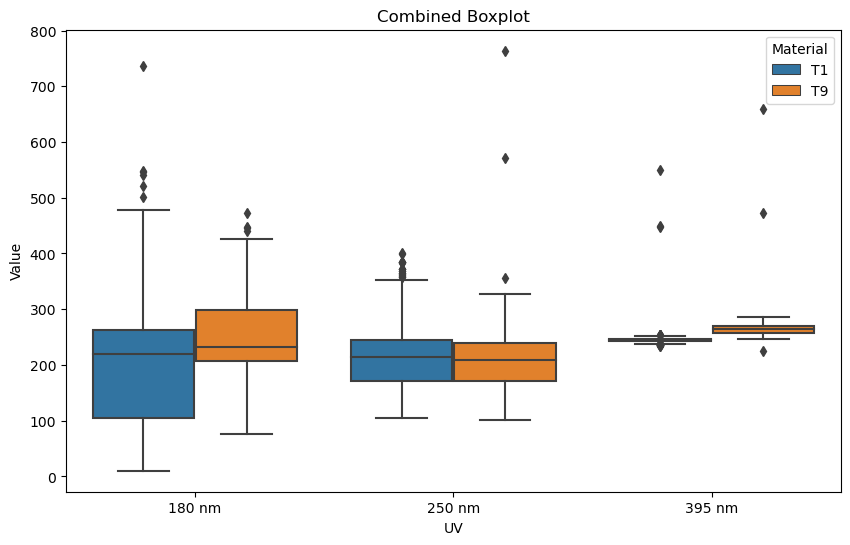

In [22]:
# Create a combined boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted_df, x="UV", y="Value", hue="Material")
plt.title("Combined Boxplot")

In [23]:
melted_df['Value'].describe()

count    2430.000000
mean      233.835226
std        73.864953
min        10.200000
25%       200.400000
50%       243.100000
75%       262.000000
max       763.800000
Name: Value, dtype: float64

<Axes: xlabel='T1', ylabel='Count'>

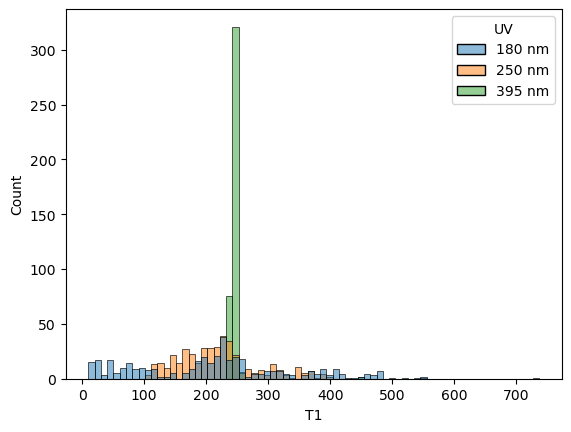

In [24]:
sns.histplot(data=df, x="T1", hue="UV")

<Axes: xlabel='T1', ylabel='Density'>

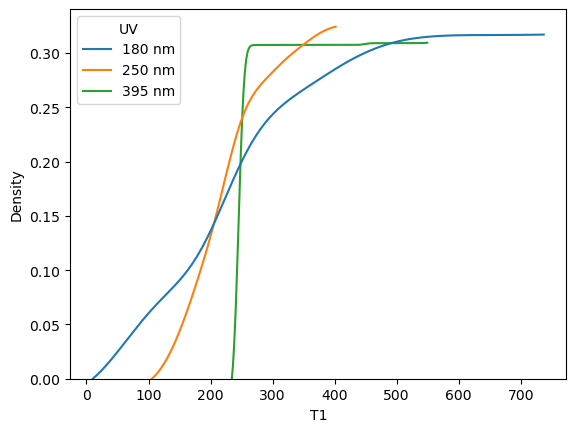

In [25]:
sns.kdeplot(data=df, x="T1", hue="UV", cut=0, cumulative=True)

<Axes: xlabel='T9', ylabel='Count'>

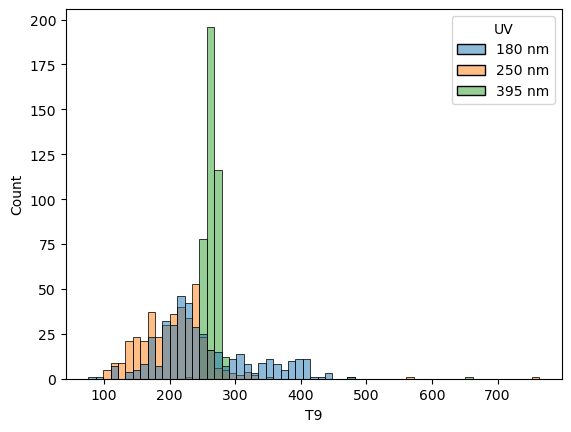

In [26]:
sns.histplot(data=df, x="T9", hue="UV")

<Axes: xlabel='T9', ylabel='Density'>

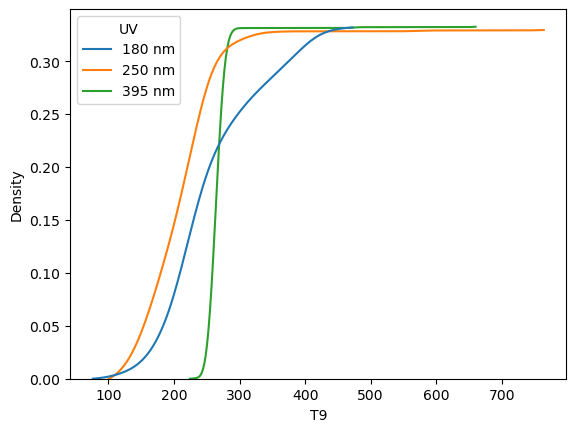

In [27]:
sns.kdeplot(data=df, x="T9", hue="UV", cut=0, cumulative=True)

In [28]:
import datetime

# Mapping of times to labels
time_labels = {
    '1900-01-01 00:00:00': '$T_0$',
    '1900-01-01 05:00:00': '$T_1$',
    '1900-01-01 10:00:00': '$T_2$',
    '1900-01-01 15:00:00': '$T_3$',
    '1900-01-01 20:00:00': '$T_4$',
    '1900-01-02 01:00:00': '$T_5$',
    '1900-01-02 06:00:00': '$T_6$',
    '1900-01-02 11:00:00': '$T_7$',
    '1900-01-02 16:00:00': '$T_8$',
    '1900-01-02 21:00:00': '$T_9$',
    '1900-01-03 02:00:00': '$T_{10}$',
    '1900-01-03 07:00:00': '$T_{11}$',
    '1900-01-03 12:00:00': '$T_{12}$',
    '1900-01-03 17:00:00': '$T_{13}$',
    '1900-01-03 22:00:00': '$T_{14}$'
}


# Convert 'H' column values to strings
melted_df['Time'] = melted_df['Time'].astype(str)

melted_df['Time']

0       1900-01-01 00:00:00
1       1900-01-01 00:00:00
2       1900-01-01 00:00:00
3       1900-01-01 00:00:00
4       1900-01-01 00:00:00
               ...         
2425    1900-01-03 22:00:00
2426    1900-01-03 22:00:00
2427    1900-01-03 22:00:00
2428    1900-01-03 22:00:00
2429    1900-01-03 22:00:00
Name: Time, Length: 2430, dtype: object

In [29]:
# Create a new column with labels
melted_df['Time_Label'] = melted_df['Time'].map(time_labels)

melted_df.head()

,Temperatura,Hr,UV,Muestra,Time,HOUR,Material,Value,Measurement,Time_Label
0,15.0,0.79,180 nm,1,1900-01-01 00:00:00,0.0,T1,280.8,T1_180,$T_0$
1,15.0,0.79,180 nm,2,1900-01-01 00:00:00,0.0,T1,243.2,T1_180,$T_0$
2,15.0,0.79,180 nm,3,1900-01-01 00:00:00,0.0,T1,242.6,T1_180,$T_0$
3,15.0,0.79,180 nm,4,1900-01-01 00:00:00,0.0,T1,251.6,T1_180,$T_0$
4,15.0,0.79,180 nm,5,1900-01-01 00:00:00,0.0,T1,247.6,T1_180,$T_0$


In [30]:
#melted_df = 
melted_df.drop(melted_df[melted_df['Value']>546.3].index, inplace=True)
melted_df.drop(melted_df[(melted_df['UV']=='395 nm')& (melted_df['Value']>400)].index, inplace=True)

In [31]:
# Find the 75th and 25th percentiles
value_seventy_fifth = melted_df["Value"].quantile(0.75)
value_twenty_fifth = melted_df["Value"].quantile(0.25)

# Calculate iqr
value_iqr = value_seventy_fifth - value_twenty_fifth

# Calculate the thresholds
upper = value_seventy_fifth + (4.5 * value_iqr)
lower = value_twenty_fifth - (1.5 *value_iqr)

# Subset the data
#planes = planes[(planes["Price"] > lower) & (planes["Price"] < upper)]

melted_df[melted_df['Value']<550]
# Count and print the number of outliers
#print(len(outliers))

print(upper)

537.0000000000001


/Users/Mila/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


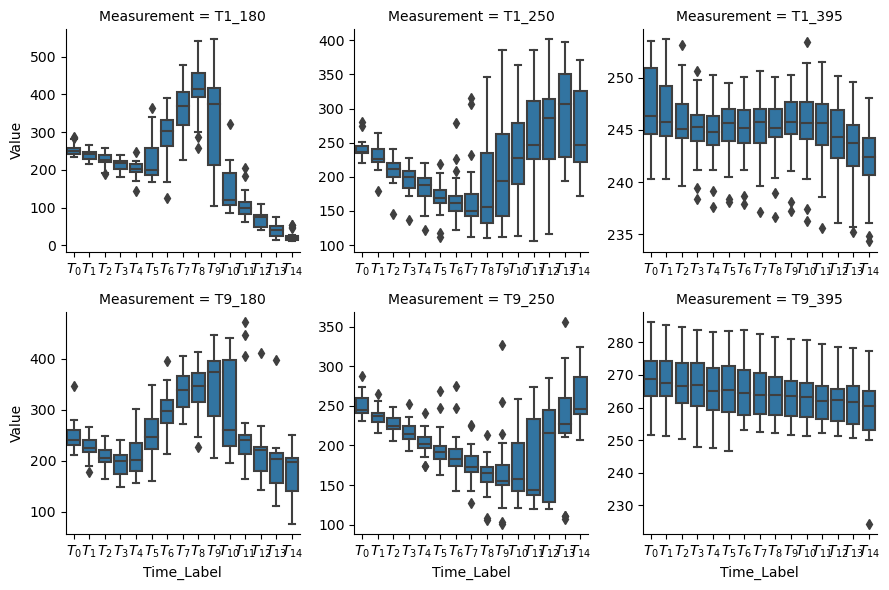

In [32]:
g = sns.FacetGrid(melted_df,col="Measurement",col_wrap=3,sharex=False, sharey=False, margin_titles=True)
g.map(sns.boxplot, "Time_Label", "Value", order=['$T_0$','$T_1$','$T_2$','$T_3$','$T_4$','$T_5$','$T_6$', '$T_7$', '$T_8$', '$T_9$','$T_{10}$','$T_{11}$','$T_{12}$','$T_{13}$','$T_{14}$'])


/Users/Mila/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


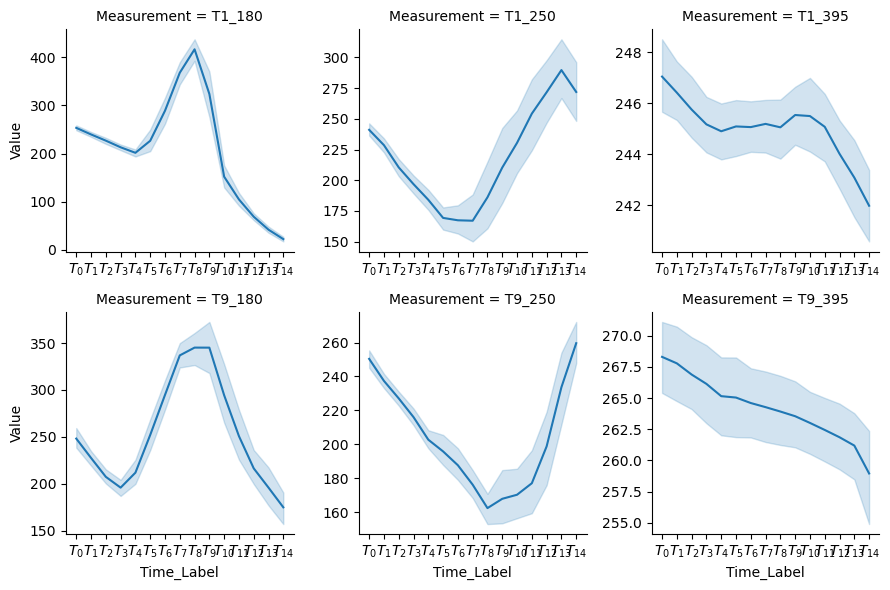

In [33]:
g = sns.FacetGrid(melted_df,col="Measurement",col_wrap=3,sharex=False, sharey=False, margin_titles=True)
g.map(sns.lineplot, "Time_Label", "Value")



sns.relplot(
    data=df[df['UV']=='180 nm'], x="Time", y="T1",
    col="Muestra",
    kind="scatter"
)

In [34]:
melted_df.groupby('Measurement').describe()

Temperatura                                                    \
                  count       mean       std  min   25%   50%   75%   max   
Measurement                                                                 
T1_180            403.0  14.166005  3.035890  9.5  11.0  14.3  17.6  19.1   
T1_250            405.0  14.366667  3.123617  9.5  11.2  15.0  17.0  20.0   
T1_395            402.0  14.221642  3.008426  9.5  11.0  14.9  17.0  19.6   
T9_180            405.0  14.146667  3.041271  9.5  11.0  14.3  17.6  19.1   
T9_250            403.0  14.366253  3.122969  9.5  11.2  15.0  17.0  20.0   
T9_395            403.0  14.223573  3.007406  9.5  11.0  14.9  17.0  19.6   

                Hr            ...  HOUR        Value                          \
             count      mean  ...   75%   max  count        mean         std   
Measurement                   ...                                              
T1_180       403.0  0.724045  ...  55.0  70.0  403.0  210.219851  123.394040   
T1_250       405.0  0.734000  ...  55.0  70.0  405.0  218.572099   64.765625   
T1_395       402.0  0.729430  ...  55.0  70.0  402.0  244.987065    3.487288   
T9_180       405.0  0.724000  ...  55.0  70.0  405.0  253.036790   73.304951   
T9_250       403.0  0.734516  ...  55.0  70.0  403.0  204.326799   45.095121   
T9_395       403.0  0.729878  ...  55.0  70.0  403.0  264.200496    8.115083   

                                                   
               min      25%    50%     75%    max  
Measurement                                        
T1_180        10.2  104.500  219.4  260.80  546.3  
T1_250       105.3  171.200  214.5  245.60  401.6  
T1_395       234.3  243.425  245.2  247.10  253.7  
T9_180        76.3  206.300  231.8  298.20  472.3  
T9_250       100.6  170.500  208.4  237.85  356.2  
T9_395       224.3  257.600  264.2  269.65  286.2  

[6 rows x 40 columns]

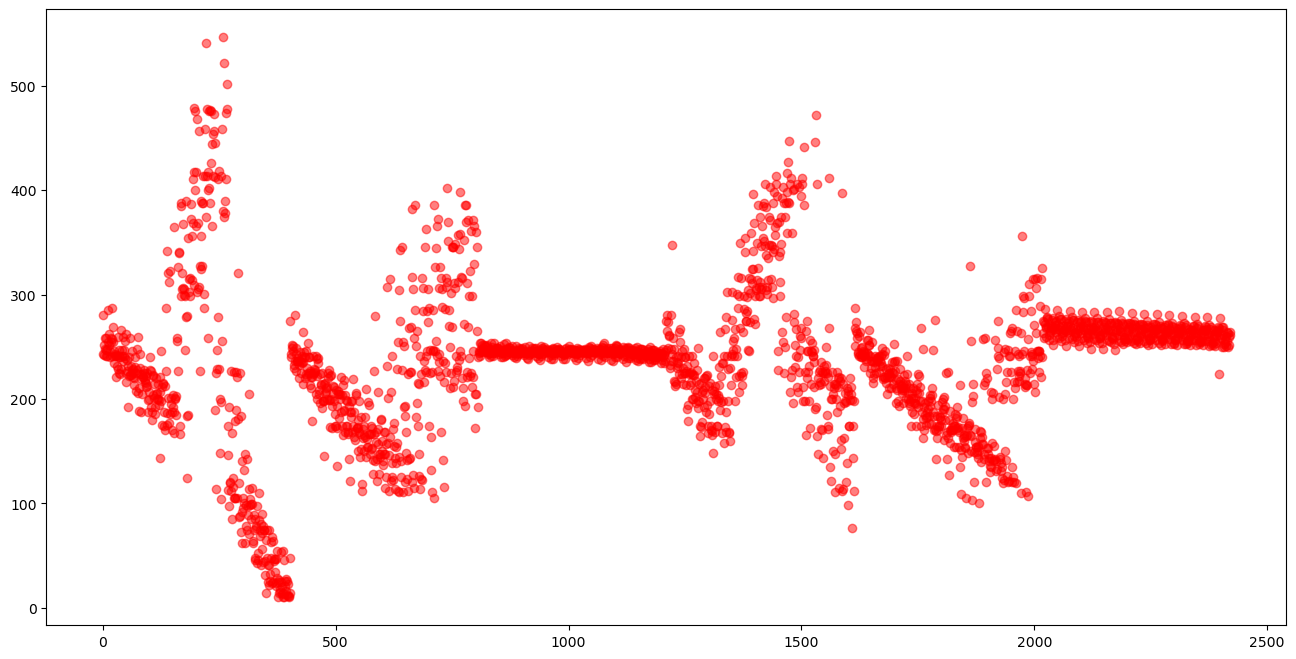

In [34]:
# Create a list of consecutive integers
integers = range(len(melted_df))

plt.figure(figsize=(16, 8))

# Plot a scatterplot
plt.scatter(integers, melted_df['Value'], c='red', alpha=0.5)
plt.show()

<Axes: xlabel='Value'>

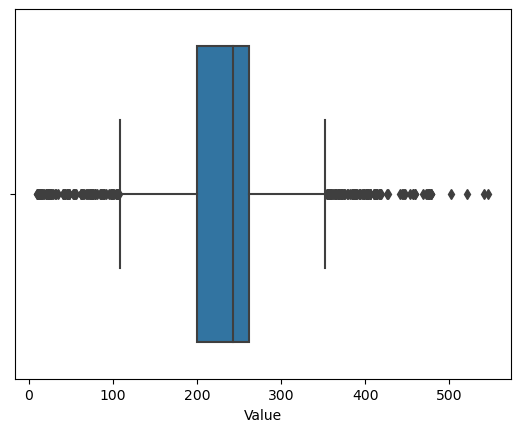

In [35]:
sns.boxplot(data= melted_df,x='Value')

In [36]:
# Removing some outliers
#melted_df = melted_df[melted_df['Value']<550]

/Users/Mila/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


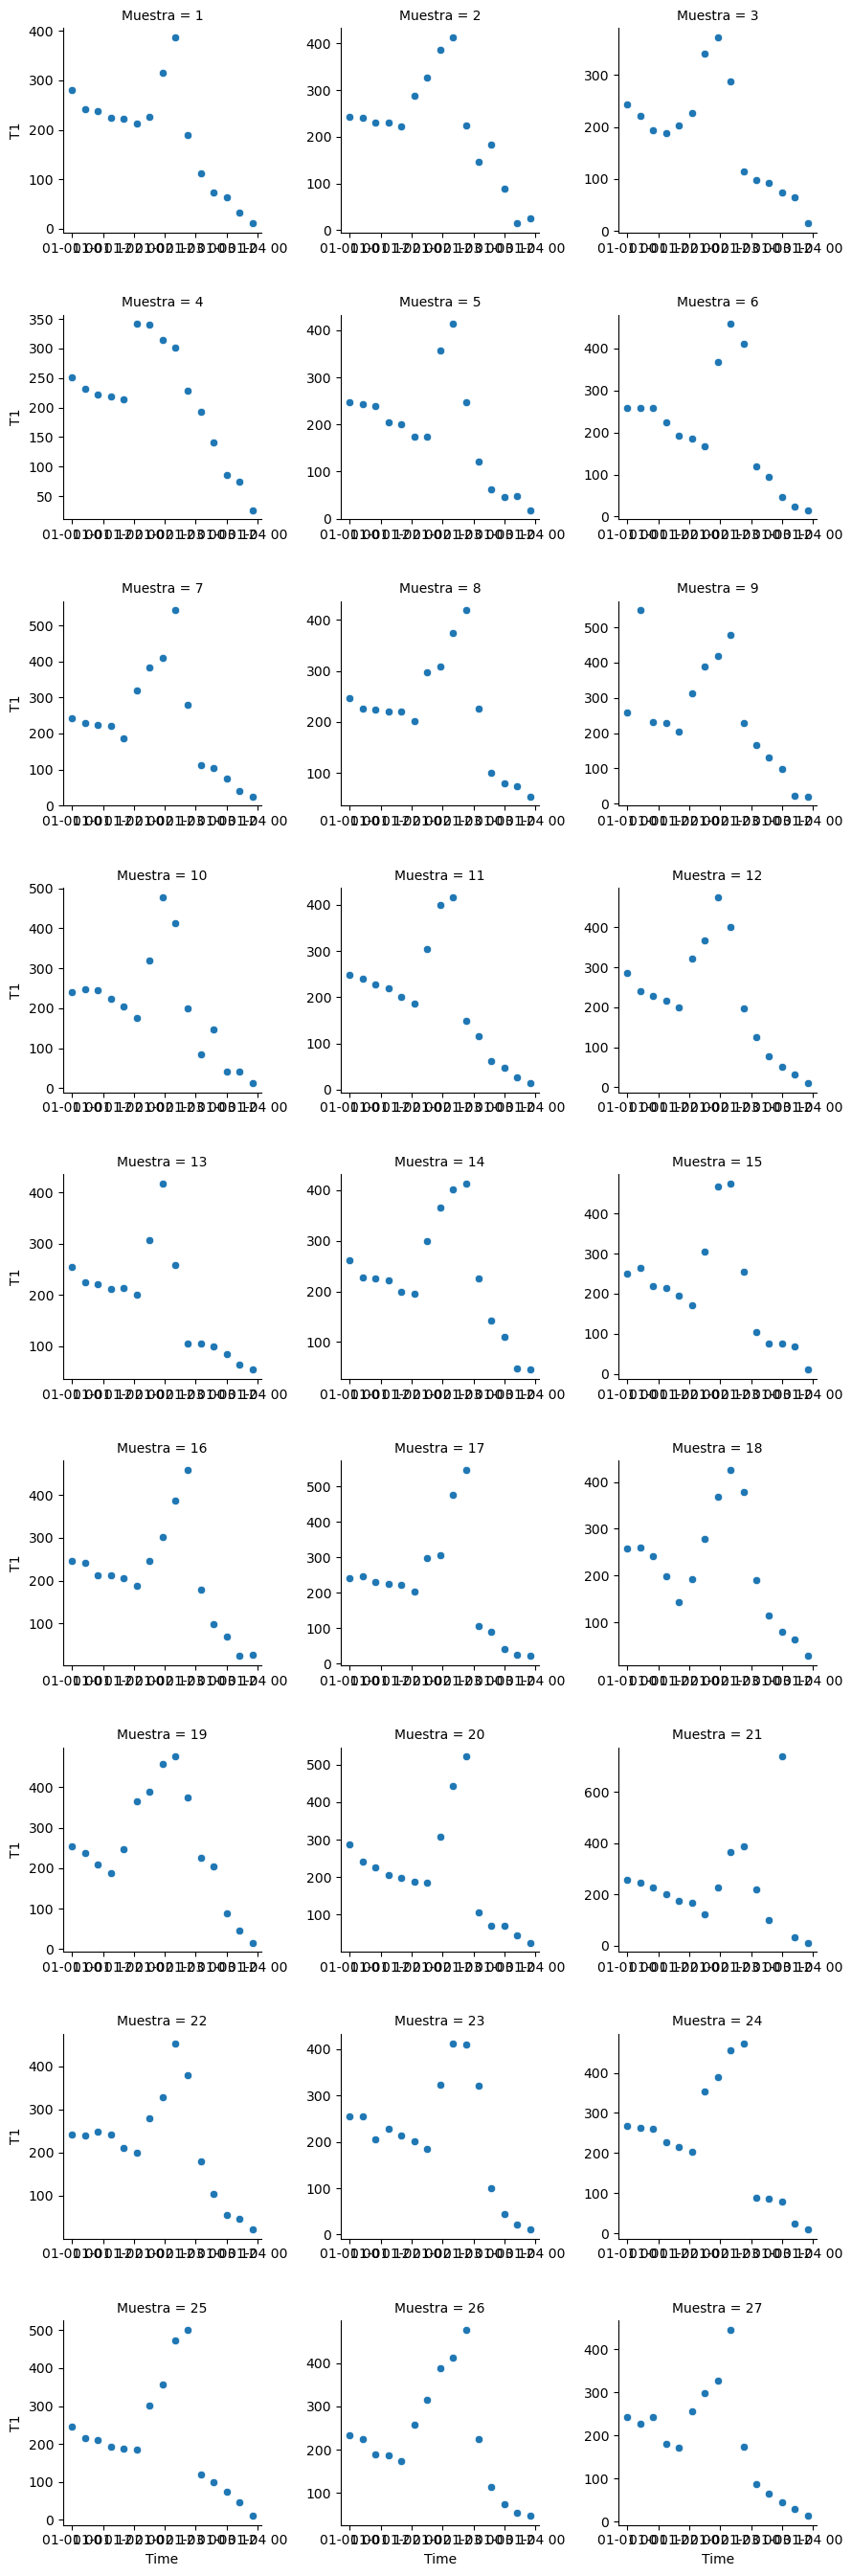

In [37]:
# Create a 9x3 grid of plots using FacetGrid
g = sns.FacetGrid(
    data=df[df['UV']=='180 nm'], col="Muestra",
    col_wrap=3,  # Number of columns
    height=3, aspect=1,sharex=False, sharey=False  # Adjust plot size and aspect ratio
)

# Plot scatter plots in each subplot
g.map(sns.scatterplot, "Time", "T1")

g.fig.subplots_adjust(wspace=0.4, hspace=0.4)  # Adjust spacing between subplots
plt.show()


In [35]:
deriv =df[(df['UV']=='180 nm')&(df['Muestra']==7)]

x = deriv['HOUR']
y = deriv['T1']

## Derivative
dt1dt = np.gradient(y,x)

In [36]:
x[1:][(dt1dt[1:]*dt1dt[:-1]<0)]

114    20.0
222    40.0
Name: HOUR, dtype: float64

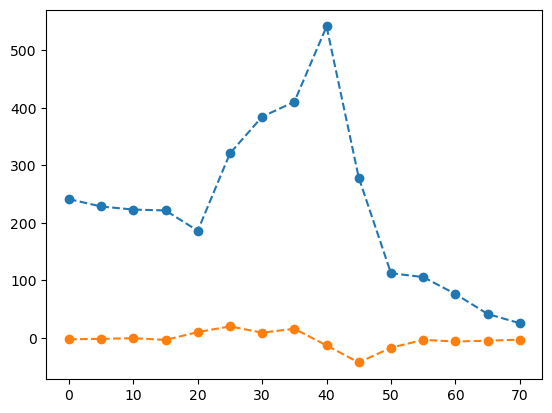

In [37]:
plt.plot(x,y, 'o--')

plt.plot(x,dt1dt, 'o--')
#dt1dt

/Users/Mila/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


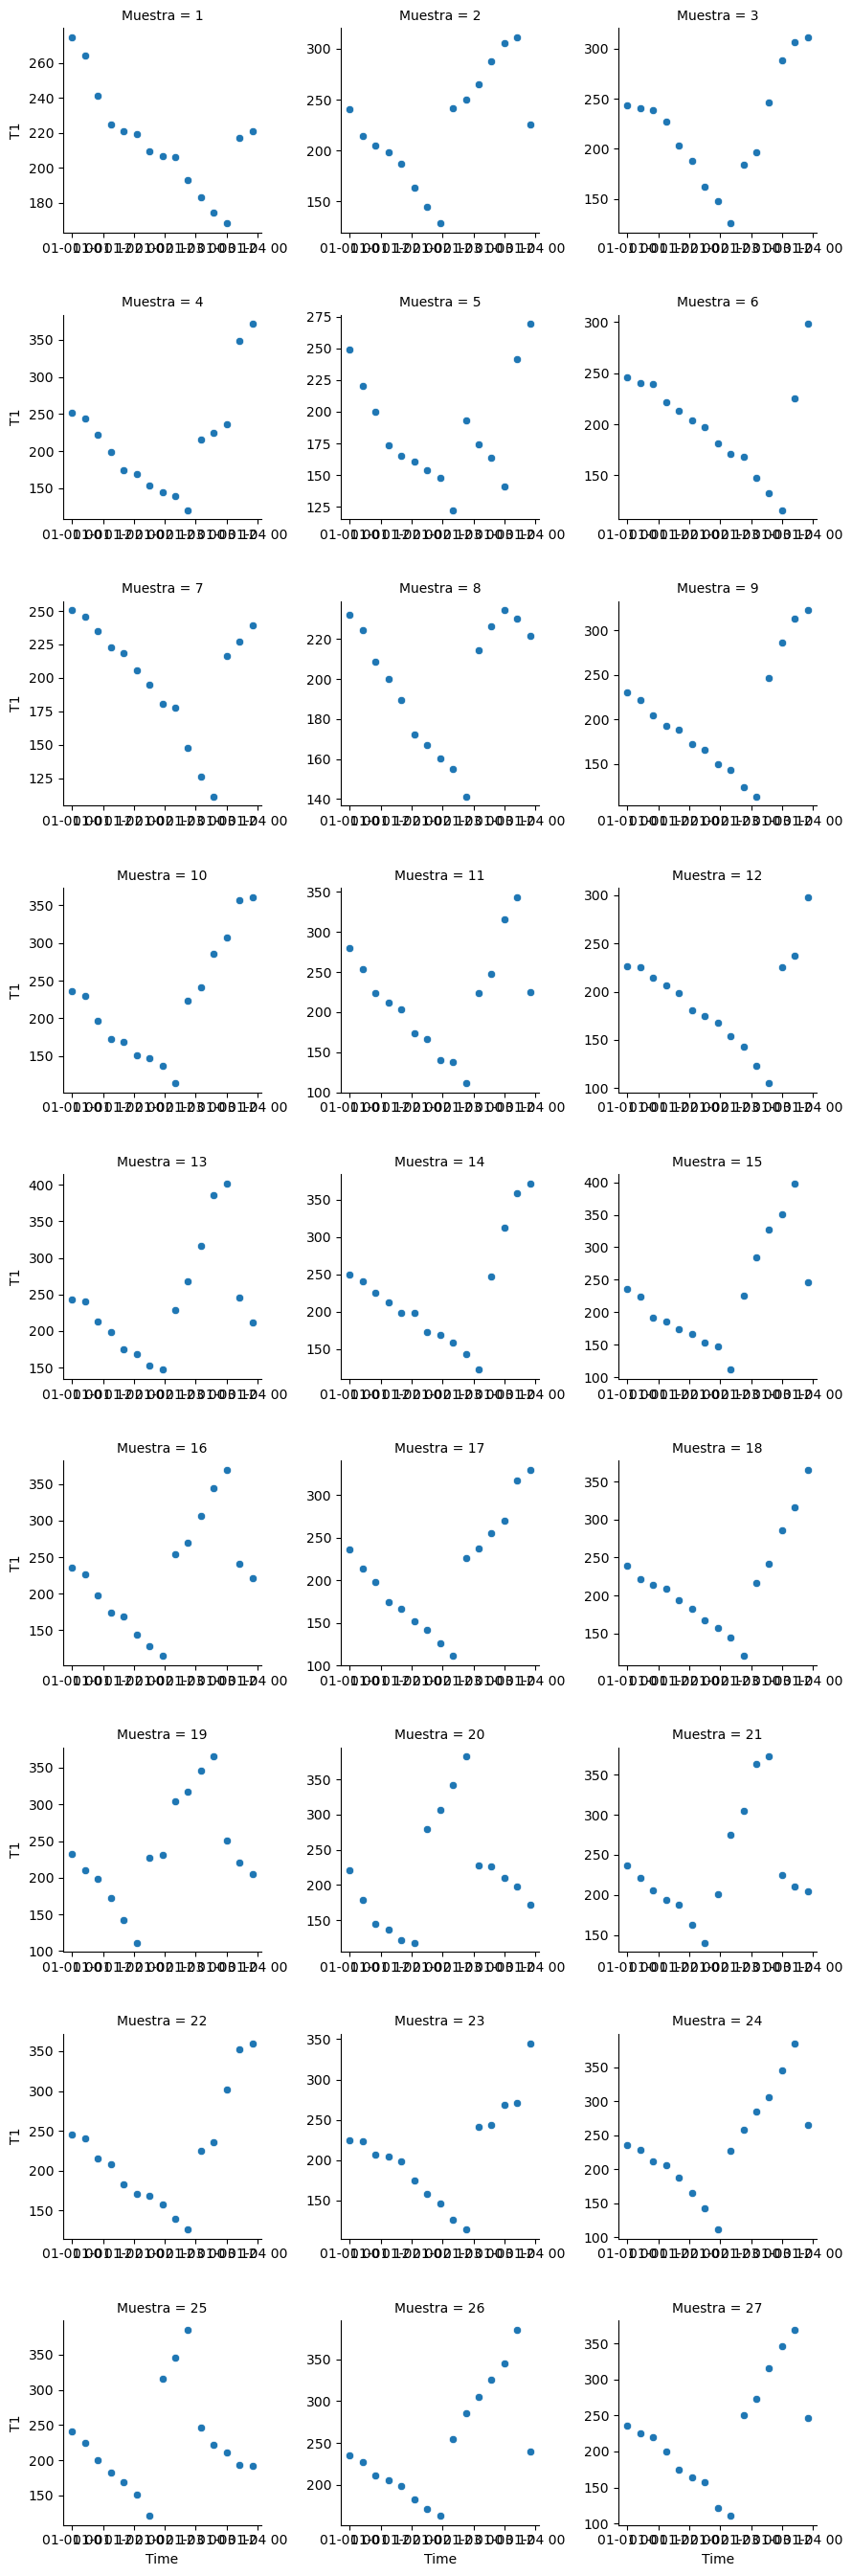

In [41]:
# Create a 9x3 grid of plots using FacetGrid
g = sns.FacetGrid(
    data=df[df['UV']=='250 nm'], col="Muestra",
    col_wrap=3,  # Number of columns
    height=3, aspect=1,sharex=False, sharey=False  # Adjust plot size and aspect ratio
)

# Plot scatter plots in each subplot
g.map(sns.scatterplot, "Time", "T1")

g.fig.subplots_adjust(wspace=0.4, hspace=0.4)  # Adjust spacing between subplots
plt.show()

In [42]:
melted_df.head()

,Temperatura,Hr,UV,Muestra,Time,HOUR,Material,Value,Measurement,Time_Label
0,15.0,0.79,180 nm,1,1900-01-01 00:00:00,0.0,T1,280.8,T1_180,$T_0$
1,15.0,0.79,180 nm,2,1900-01-01 00:00:00,0.0,T1,243.2,T1_180,$T_0$
2,15.0,0.79,180 nm,3,1900-01-01 00:00:00,0.0,T1,242.6,T1_180,$T_0$
3,15.0,0.79,180 nm,4,1900-01-01 00:00:00,0.0,T1,251.6,T1_180,$T_0$
4,15.0,0.79,180 nm,5,1900-01-01 00:00:00,0.0,T1,247.6,T1_180,$T_0$


In [43]:
melted_df.corr()

ValueError: could not convert string to float: '1900-01-01 00:00:00'

In [ ]:
sns.heatmap(melted_df.corr(), annot=True)

/Users/Mila/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


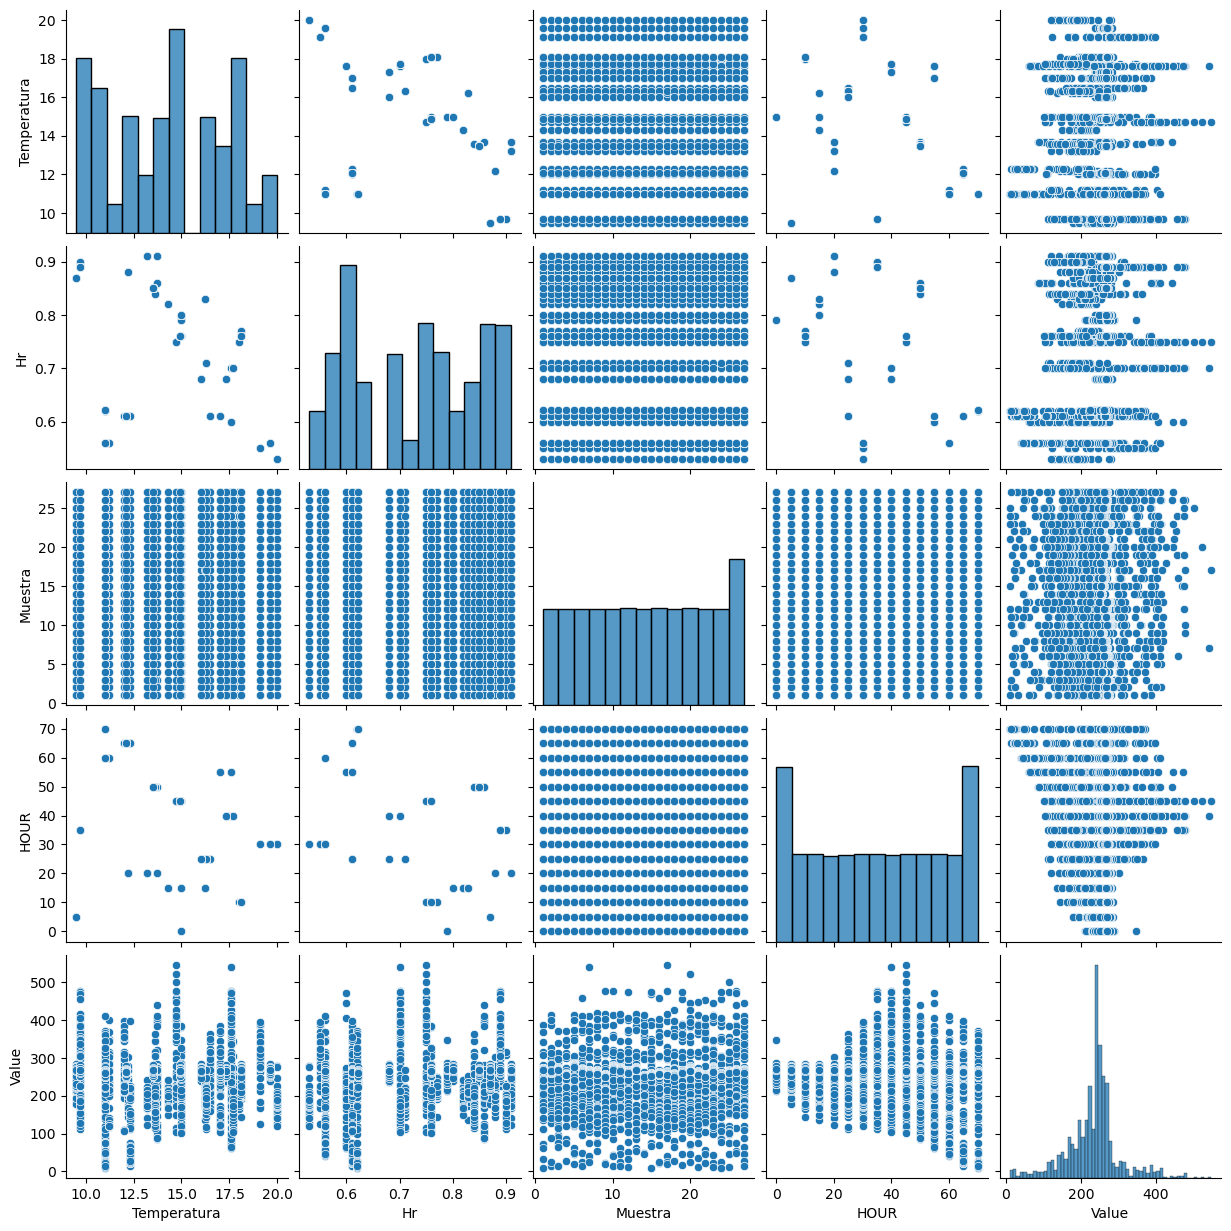

In [44]:
sns.pairplot(data=melted_df)

In [121]:
print(melted_df["Measurement"].value_counts())

Measurement
T1_250    405
T9_180    405
T1_180    403
T9_250    403
T9_395    403
T1_395    402
Name: count, dtype: int64


In [122]:
melted_df[(melted_df['Measure']=='180 nm')&(df['Muestra']==7)]


KeyError: 'Measure'

In [38]:
cosa = melted_df[melted_df['Measurement']=='T1_180'].groupby(["Material", "HOUR"])['Value'].agg('mean')

In [39]:
cosa

Material  HOUR
T1        0.0     253.507407
          5.0     239.780769
          10.0    226.900000
          15.0    213.107407
          20.0    201.670370
          25.0    226.614815
          30.0    289.022222
          35.0    367.959259
          40.0    416.607407
          45.0    323.840741
          50.0    152.025926
          55.0    104.825926
          60.0     68.934615
          65.0     41.985185
          70.0     22.377778
Name: Value, dtype: float64

In [40]:
cosa[4:-4]

Material  HOUR
T1        20.0    201.670370
          25.0    226.614815
          30.0    289.022222
          35.0    367.959259
          40.0    416.607407
          45.0    323.840741
          50.0    152.025926
Name: Value, dtype: float64

In [41]:
x = deriv['HOUR']
y = cosa

## Derivative
dt1dt = np.gradient(y,x)

In [42]:
dt1dt

array([ -2.74532764,  -2.66074074,  -2.66733618,  -2.52296296,
         1.35074074,   8.73518519,  14.13444444,  12.75851852,
        -4.41185185, -26.45814815, -21.90148148,  -8.30913105,
        -6.28407407,  -4.65568376,  -3.92148148])

In [43]:
def gauss_f(x,A,mu,sig):
    return A*np.exp(-(x-mu)**2/(2*sig**2))

In [45]:
x_data_cropped = x[(x>15.0) * (x<60.00)]
y_data_cropped = cosa[4:-3]

In [46]:
y_data_cropped

Material  HOUR
T1        20.0    201.670370
          25.0    226.614815
          30.0    289.022222
          35.0    367.959259
          40.0    416.607407
          45.0    323.840741
          50.0    152.025926
          55.0    104.825926
Name: Value, dtype: float64

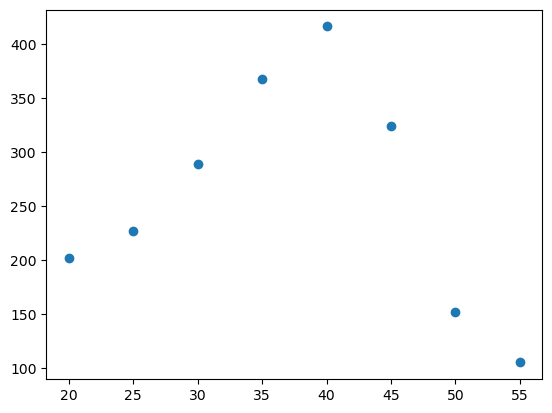

In [47]:
plt.scatter(x_data_cropped, y_data_cropped)
plt.show()

In [48]:
from scipy.optimize import curve_fit

popt, pcov = curve_fit(gauss_f, x_data_cropped, y_data_cropped, p0=[417, 40, 10])

In [49]:
x_model = np.linspace(min(x_data_cropped), max(x_data_cropped), 1000)
y_model = gauss_f(x_model, *popt)

In [50]:
popt

array([386.24549238,  36.43520038,  11.76938566])

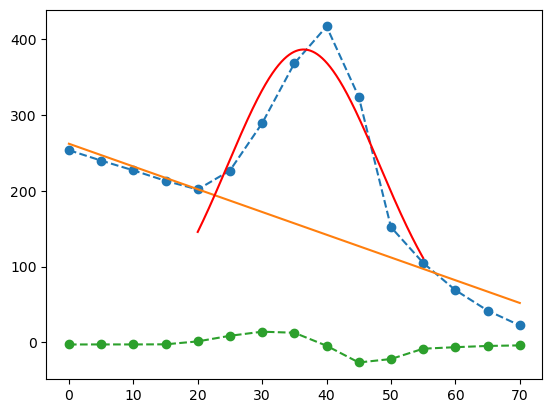

In [51]:
plt.plot(x,y, 'o--')
plt.plot(x, -3*x+262)
plt.plot(x_model, y_model, color='r')
plt.plot(x, dt1dt,'o--')

In [52]:
x[1:][(dt1dt[1:]*dt1dt[:-1]<0)]

114    20.0
222    40.0
Name: HOUR, dtype: float64

In [53]:
417-((-3*40)+262)

275

In [54]:
def Gauss(x1,a,u,s):
    G = a*(np.exp(-(1/2.0)*((u-x1)/(s))**2))
    return G
'''Descripcion:
x1 es x, a es peso, u es centroide, s es sigma, esta es la distribucion gaussiana.'''


def Gauss1(x1,a1,u,s,c,d,e):
    G1 = a1*(np.exp(-(1/2.0)*((u-x1)/s)**2)) + c + d*(x1 - e)
    return G1
'''Descripcion:
retorna una gausiana mas una recta de pendiente d'''

'Descripcion:\nretorna una gausiana mas una recta de pendiente d'

In [55]:
popt, pcov = curve_fit(Gauss1, x_data_cropped, y_data_cropped, p0=[275,40,10,332,-3.3,-22.5])

In [56]:
popt

array([  283.12026585,    39.26360829,     6.74420462, -1065.83145914,
          -3.69622442,   364.02060606])

In [57]:
x_model = np.linspace(min(x), max(x), 1000)
y_model = Gauss1(x_model, *popt)

Text(0.5, 1.0, 'Material T1 180 nm')

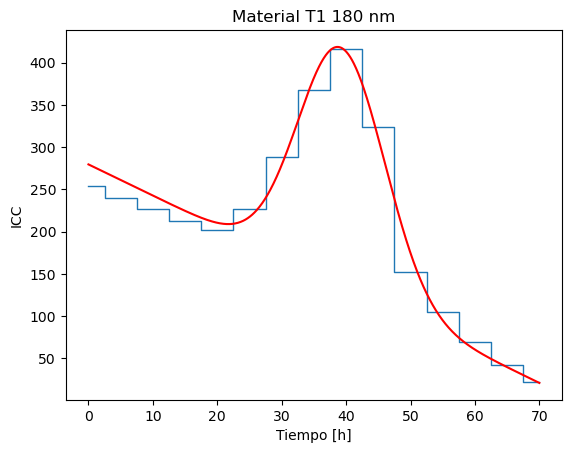

In [60]:
c = 609.03794836
d = -3.69622445
e = -89.10914025
plt.plot(x,y,drawstyle='steps-mid',lw=1)
#plt.plot(x, c+ d*(x - e))
#plt.plot(x, -3.28388626*x+257.92393838)
#plt.plot(x, 331.72950983+ -3.28388626*(x +22.47506987))

plt.plot(x_model, y_model, color='r')
#plt.plot(x,Gauss(x,popt[0],popt[1],popt[2])+331.72950983+ -3.28388626*(x +22.47506987))
plt.xlabel('Tiempo [h]')
plt.ylabel('ICC')
plt.title('Material T1 180 nm')

In [214]:
x[~((x>15.0) * (x<60.00))]

6       0.0
33      5.0
60     10.0
87     15.0
330    60.0
357    65.0
384    70.0
Name: HOUR, dtype: float64

In [237]:
cosa[0:4],cosa[12:]

(Material  HOUR
 T1        0.0     253.507407
           5.0     239.780769
           10.0    226.900000
           15.0    213.107407
 Name: Value, dtype: float64,
 Material  HOUR
 T1        60.0    68.934615
           65.0    41.985185
           70.0    22.377778
 Name: Value, dtype: float64)

In [238]:
xx = [0,5,10,15,60,65,70]
yy = [253.507407,239.780769,226.900000, 213.107407,68.934615,41.985185,22.377778]

In [250]:
def func(x,c,d,e):
    return c + d*(x - e)

In [251]:
#### curve fit [with only y-error]
popt,pcov=curve_fit(func,xx,yy)

In [252]:
popt

array([331.72950983,  -3.28388626, -22.47506987])

In [61]:
cosa_1 = melted_df[melted_df['Measurement']=='T9_180'].groupby(["Material", "HOUR"])['Value'].agg('mean')

In [62]:
cosa_1

Material  HOUR
T9        0.0     248.074074
          5.0     227.433333
          10.0    207.262963
          15.0    195.744444
          20.0    211.703704
          25.0    251.933333
          30.0    294.633333
          35.0    336.807407
          40.0    345.125926
          45.0    345.081481
          50.0    294.300000
          55.0    250.688889
          60.0    216.285185
          65.0    195.744444
          70.0    174.733333
Name: Value, dtype: float64

In [71]:
x = deriv['HOUR']
y = cosa_1

## Derivative
dt1dt = np.gradient(y,x)

In [78]:
x_data_cropped = x[(x>10.0) * (x<70.00)]
y_data_cropped = cosa_1[3:-1]

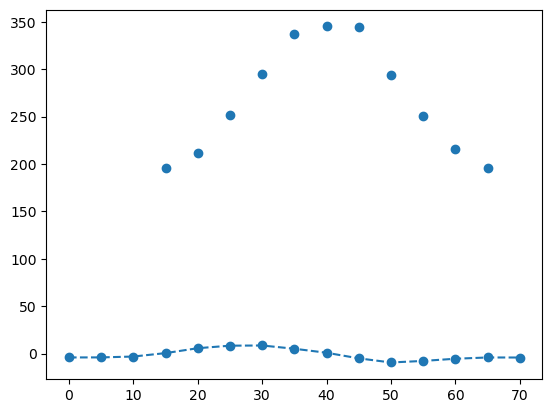

In [85]:
plt.scatter(x_data_cropped, y_data_cropped)
plt.plot(x, dt1dt,'o--')
plt.show()

In [86]:
x[1:][(dt1dt[1:]*dt1dt[:-1]<0)]

87     15.0
249    45.0
Name: HOUR, dtype: float64

In [81]:
popt1, pcov1 = curve_fit(Gauss1, x_data_cropped, y_data_cropped, p0=[342,40,10,332,-3.3,-22.5])

In [82]:
popt1

array([ 1.71643078e+02,  4.01468031e+01,  1.12005135e+01,  1.86204687e+02,
       -5.58152642e-03, -9.56372198e+02])

In [97]:
x_model = np.linspace(min(x), max(x), 1000)
y_model = Gauss1(x_model[180:], *popt1)

Text(0.5, 1.0, 'Material T9 180 nm')

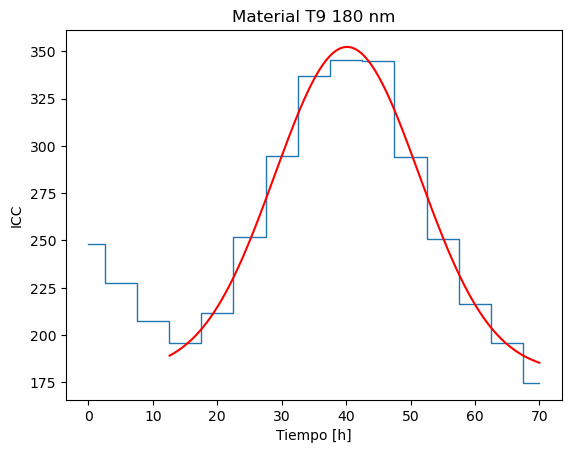

In [98]:

plt.plot(x,y,drawstyle='steps-mid',lw=1)

plt.plot(x_model[180:], y_model, color='r')
#plt.plot(x,Gauss(x,popt[0],popt[1],popt[2])+331.72950983+ -3.28388626*(x +22.47506987))
plt.xlabel('Tiempo [h]')
plt.ylabel('ICC')
plt.title('Material T9 180 nm')